**Necessary imports**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


**Load the CSV file**





In [18]:
df = pd.read_csv("/content/BTC-USD.csv")
#df.head()
#df.tail()
#df.shape #(3512,7)#this gives number of colunms and rows in csv file hava
#df.size #24584
#df.describe() #this gives some basic statistic of the data like mean, standard deviation etc.
#df.values #this give the rows as an array
df.count()
#df['Close'].value_counts()

Date         3512
Open         3512
High         3512
Low          3512
Close        3512
Adj Close    3512
Volume       3512
dtype: int64

**Round the data to 4 decomal places**

In [19]:
columns_to_4decimals=['Open','High','Low','Close']
decimal_places=4
df[columns_to_4decimals] = np.round(df[columns_to_4decimals],decimal_places)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864,468.174,452.422,457.334,457.334015,21056800
1,2014-09-18,456.860,456.860,413.104,424.440,424.440002,34483200
2,2014-09-19,424.103,427.835,384.532,394.796,394.795990,37919700
3,2014-09-20,394.673,423.296,389.883,408.904,408.903992,36863600
4,2014-09-21,408.085,412.426,393.181,398.821,398.821014,26580100


**Drop the Adjecent Close column**

In [20]:
#df.drop(columns=['Adj Close'], inplace=True)
#inplace=True implies that no new dat is created and changed in existing dataframe
df



,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.8640,468.1740,452.4220,457.3340,457.334015,21056800
1,2014-09-18,456.8600,456.8600,413.1040,424.4400,424.440002,34483200
2,2014-09-19,424.1030,427.8350,384.5320,394.7960,394.795990,37919700
3,2014-09-20,394.6730,423.2960,389.8830,408.9040,408.903992,36863600
4,2014-09-21,408.0850,412.4260,393.1810,398.8210,398.821014,26580100
...,...,...,...,...,...,...,...
3507,2024-04-24,66408.7188,67075.3672,63589.8711,64276.8984,64276.898438,30276655120
3508,2024-04-25,64275.0195,65275.2070,62783.6328,64481.7070,64481.707031,32155786816
3509,2024-04-26,64485.3711,64789.6562,63322.3984,63755.3203,63755.320313,24139372950
3510,2024-04-27,63750.9883,63898.3633,62424.7188,63419.1406,63419.140625,19530783039


**Re-order the columns**

In [21]:
columns_order = ['Date','Open','Low','High','Volume','Close']
df=df[columns_order]
df

,Date,Open,Low,High,Volume,Close
0,2014-09-17,465.8640,452.4220,468.1740,21056800,457.3340
1,2014-09-18,456.8600,413.1040,456.8600,34483200,424.4400
2,2014-09-19,424.1030,384.5320,427.8350,37919700,394.7960
3,2014-09-20,394.6730,389.8830,423.2960,36863600,408.9040
4,2014-09-21,408.0850,393.1810,412.4260,26580100,398.8210
...,...,...,...,...,...,...
3507,2024-04-24,66408.7188,63589.8711,67075.3672,30276655120,64276.8984
3508,2024-04-25,64275.0195,62783.6328,65275.2070,32155786816,64481.7070
3509,2024-04-26,64485.3711,63322.3984,64789.6562,24139372950,63755.3203
3510,2024-04-27,63750.9883,62424.7188,63898.3633,19530783039,63419.1406


**Convert the String date format to date-month-year format**

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')
df

<ipython-input-22-0b0538830d10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-22-0b0538830d10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')


,Date,Open,Low,High,Volume,Close
0,17-09-2014,465.8640,452.4220,468.1740,21056800,457.3340
1,18-09-2014,456.8600,413.1040,456.8600,34483200,424.4400
2,19-09-2014,424.1030,384.5320,427.8350,37919700,394.7960
3,20-09-2014,394.6730,389.8830,423.2960,36863600,408.9040
4,21-09-2014,408.0850,393.1810,412.4260,26580100,398.8210
...,...,...,...,...,...,...
3507,24-04-2024,66408.7188,63589.8711,67075.3672,30276655120,64276.8984
3508,25-04-2024,64275.0195,62783.6328,65275.2070,32155786816,64481.7070
3509,26-04-2024,64485.3711,63322.3984,64789.6562,24139372950,63755.3203
3510,27-04-2024,63750.9883,62424.7188,63898.3633,19530783039,63419.1406


**Visualization the data that we processed**

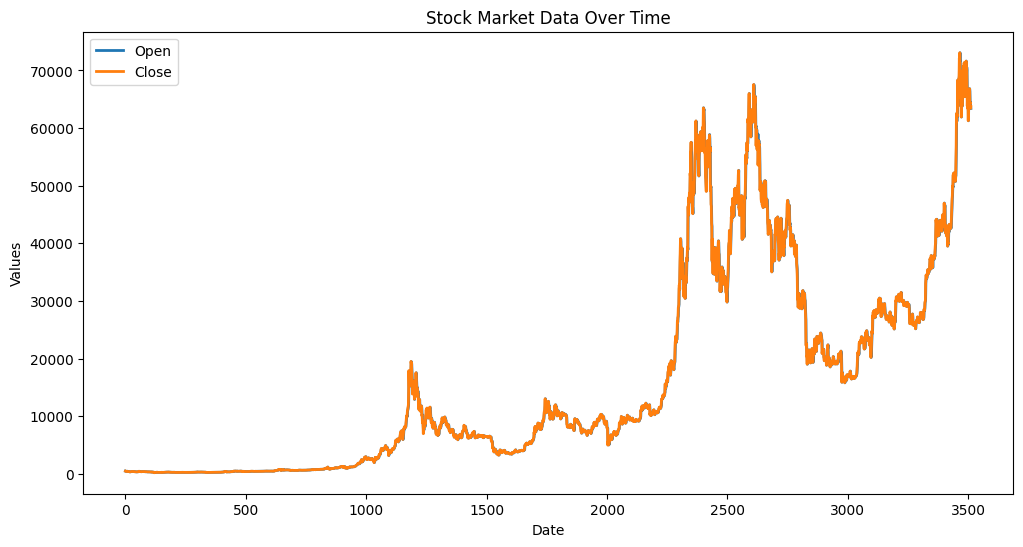

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label='Open', linewidth=2)
plt.plot(df['Close'], label='Close', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stock Market Data Over Time')
plt.legend()

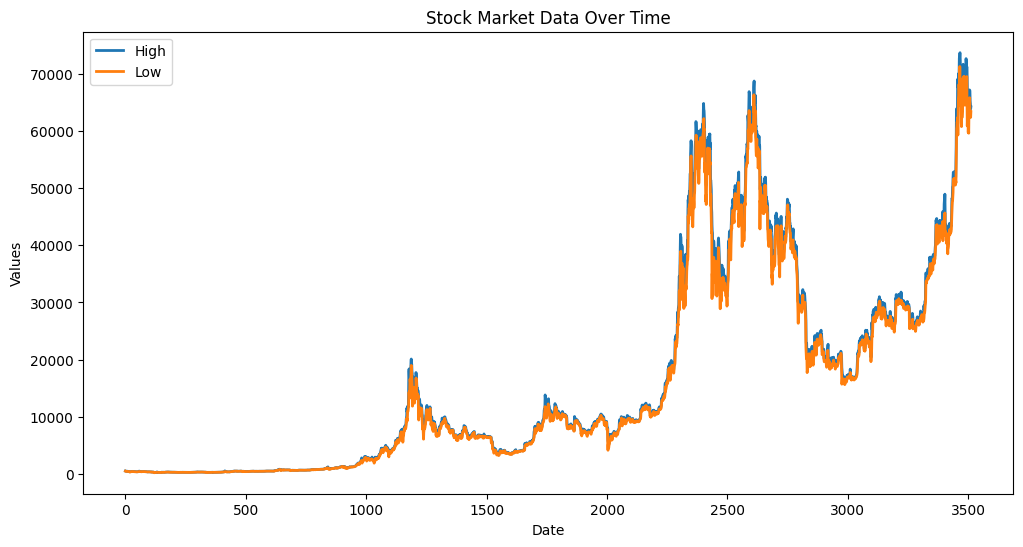

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df['High'], label='High', linewidth=2)
plt.plot(df['Low'], label='Low', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stock Market Data Over Time')
plt.legend()

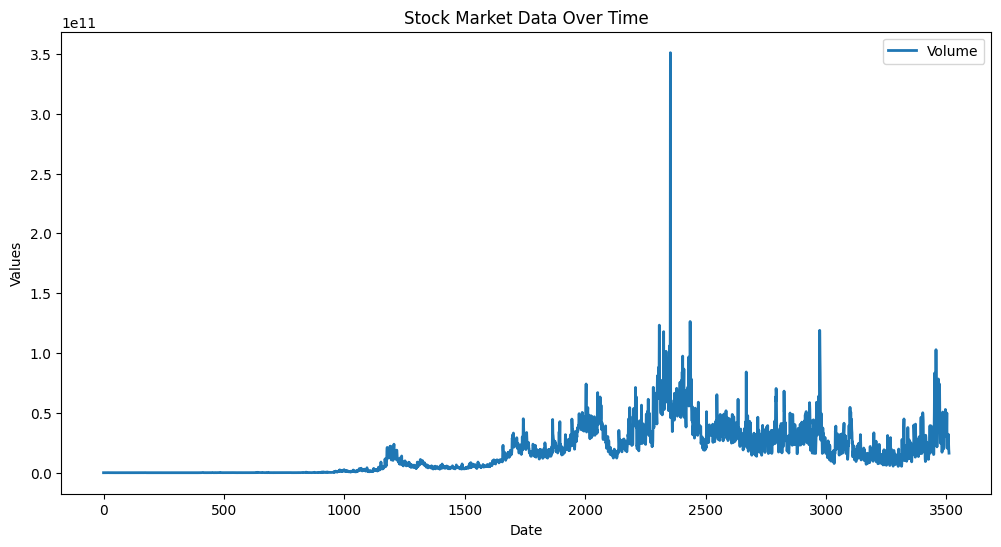

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df['Volume'], label='Volume', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stock Market Data Over Time')
plt.legend()

**Splitting the data into training and testing data**

In [26]:
x = df[['Open','Low','High','Volume']]
y= df[['Close']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)


print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (2809, 4)
x_test shape:  (703, 4)
y_train shape:  (2809, 1)
y_test shape:  (703, 1)


In [27]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#create a SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

#Train the model
svr_model.fit(x_train_scaled,y_train)

#make prediction on the test set
prediction = svr_model.predict(x_test_scaled)


#Evaluate the model
mse = mean_squared_error(y_test,prediction)
#print(prediction)
print("Mean Squared Error: ",mse)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error:  14706626.139142483


In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

#define the parameter grid for search

param_grid={
    'kernel':['linear','rbf'],
    'C':[1,10,50,100],
    'epsilon':[0.01,0.1,0.2,0.5]
}

svr = SVR()

grid_search = GridSearchCV(svr,param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(x_train_normalized,y_train)

best_params=grid_search.best_params_

#train the model with the best parameters

best_svr_model=SVR(**best_params)
best_svr_model.fit(x_train_normalized,y_train)

#make prediction on the test set
prediction = best_svr_model.predict(x_test_normalized)


#evaluate the model
mse = mean_squared_error(y_test,prediction)

print("Best Hyperparameters: ", best_params)
print("Mean Squared Error: ",mse)




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Hyperparameters:  {'C': 100, 'epsilon': 0.5, 'kernel': 'linear'}
Mean Squared Error:  319541.11980255274


In [29]:
from sklearn.metrics import r2_score

r2=r2_score(y_test,prediction)
accuracy_percentage=r2*100
print("R-squred(Accuracy) in percentage: ", accuracy_percentage)

R-squred(Accuracy) in percentage:  99.88741919205833
